## Attempted to scrap dat from reddit and I can't seem to find the specific thing that I'm looking for 

In [1]:
pip install praw


Note: you may need to restart the kernel to use updated packages.


In [2]:
import datetime

In [2]:
pip install tweepy


   ---------------------------------------- 0.0/98.5 kB ? eta -:--:--
   ------------ --------------------------- 30.7/98.5 kB 1.4 MB/s eta 0:00:01
   --------------------------------- ------ 81.9/98.5 kB 919.0 kB/s eta 0:00:01
   ---------------------------------------- 98.5/98.5 kB 949.2 kB/s eta 0:00:00
   ---------------------------------------- 0.0/151.7 kB ? eta -:--:--
   ----------------------------- ---------- 112.6/151.7 kB 6.4 MB/s eta 0:00:01
   ---------------------------------------- 151.7/151.7 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install requests


Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install Faker


   ---------------------------------------- 0.0/1.9 MB ? eta -:--:--
    --------------------------------------- 0.0/1.9 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.9 MB 777.7 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.9 MB 819.2 kB/s eta 0:00:03
   -- ------------------------------------- 0.1/1.9 MB 708.1 kB/s eta 0:00:03
   --- ------------------------------------ 0.2/1.9 MB 654.6 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.9 MB 692.9 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.9 MB 687.0 kB/s eta 0:00:03
   ---- ----------------------------------- 0.2/1.9 MB 654.9 kB/s eta 0:00:03
   ----- ---------------------------------- 0.3/1.9 MB 679.3 kB/s eta 0:00:03
   ------ --------------------------------- 0.3/1.9 MB 655.0 kB/s eta 0:00:03
   ------- -------------------------------- 0.4/1.9 MB 674.7 kB/s eta 0:00:03
   -------- ------------------------------- 0.4/1.9 MB 673.0 kB/s eta 0:00:03
   -

In [1]:
import pandas as pd
import random
from faker import Faker    #faker is used to generate fake but realistic data 
import datetime

fake = Faker()

# Trending topics to randomly inject
trend_topics = ["#elections2025", "#newmusic", "#kenyatrending", "#NairobiFloods", "#viral", "#AI", "#mentalhealth"]

# Function to simulate post text
def generate_post():
    base = fake.sentence(nb_words=random.randint(5, 12))  #this is saying generate a sentence between 5 to 12 words
    hashtags = random.sample(trend_topics, k=random.randint(1, 2)) #From the list of trending hashtags, randomly choose 1 or 2 hashtags, and use them in the post
    return base + " " + " ".join(hashtags) # for combining the two

# Generate data
data = []
for _ in range(500):
    post = {
        "timestamp": fake.date_time_between(start_date="-3d", end_date="now").strftime("%Y-%m-%d %H:%M:%S"), # start from 3 days ago to now and the .strftime converts the datetime object to string 
        "username": fake.user_name(),
        "text": generate_post(),
        "likes": random.randint(10, 5000), #Each fake TikTok post will have a random number of likes between 10 and 5000 — inclusive.
        "shares": random.randint(1, 1000)
    }
    data.append(post)

# Save as CSV
df = pd.DataFrame(data)
df.to_csv("data/mock_tiktok_data.csv", index=False)

print("✅ Mock data generated!")


✅ Mock data generated!


## Text Preporcessing

In [2]:
import pandas as pd
import re # stands for regular expressions  and its used for finding partterns in strings 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [3]:
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Cecily\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Cecily\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
def clean_text(text):
    # Lowercase
    text = text.lower()

    # Remove special characters (except hashtags)
    text = re.sub(r"[^a-zA-Z0-9# ]", "", text)  #Find any character that is not a letter, number, hashtag, or space and the two "" means replacing the special characters with nothing 

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens


In [6]:
df = pd.read_csv("data/mock_tiktok_data.csv")

# Apply the function
df["clean_tokens"] = df["text"].apply(clean_text)

# Preview
print(df[["text", "clean_tokens"]].head())


                                                text  \
0   Perhaps speech along relationship. #mentalhealth   
1  Necessary turn toward on happen. #mentalhealth...   
2   Vote fear Mrs cover work job. #elections2025 #AI   
3  Exist new popular no then either suddenly addr...   
4       Matter discover next out. #NairobiFloods #AI   

                                        clean_tokens  
0  [perhaps, speech, along, relationship, #, ment...  
1  [necessary, turn, toward, happen, #, mentalhea...  
2  [vote, fear, mrs, cover, work, job, #, electio...  
3  [exist, new, popular, either, suddenly, addres...  
4  [matter, discover, next, #, nairobifloods, #, ai]  


###  Extracting and visualizing hashtags

In [15]:
def extract_hashtags (text):
    hashtags =re.findall(r,"#/w+" ,text)
    return [tag.lower() for tag in hashtags]

In [8]:
from textblob import TextBlob

def get_sentiment(text):
    score = TextBlob(text).sentiment.polarity
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['text'].apply(get_sentiment)


<function matplotlib.pyplot.show(close=None, block=None)>

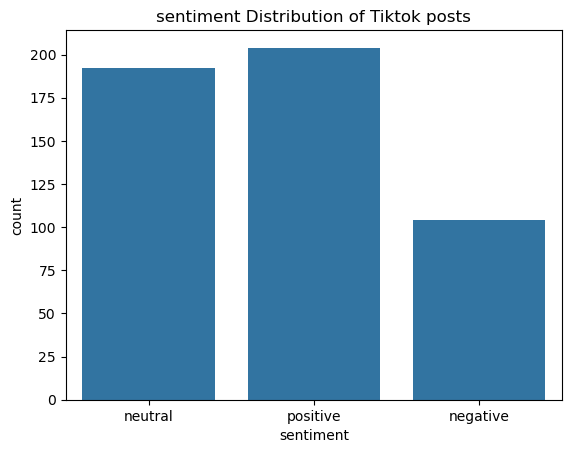

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.countplot(data=df,x='sentiment')
plt.title('sentiment Distribution of Tiktok posts')
plt.show

## Clustering Posts by Hashtags

In [ ]:
#So Here's the Plan:
# ✅ Start clustering hashtags now 

# 📈 Visualize hashtag groupings

# 💬 Label clusters like “feminism”, “tech events”, “influencers”

# 📚 Then later: learn TF-IDF + post clustering

In [10]:
df['hashtag_string'] = df['hashtags'].apply(lambda tags: ' '.join(tags)) # converting the hashtags to strings in preparation of vectorizing and clustering


KeyError: 'hashtags'

In [11]:
print(df.columns)


Index(['timestamp', 'username', 'text', 'likes', 'shares', 'clean_tokens',
       'sentiment'],
      dtype='object')


In [17]:
print (df.columns)

Index(['timestamp', 'username', 'text', 'likes', 'shares', 'clean_tokens',
       'sentiment'],
      dtype='object')
